In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colors
import numpy as np
import os
import pickle

In [2]:
exp_dir = "no6_full"
mRyToTesla = 235.0314 # 1 mRy ~ 235 Tesla for a spin with muB magnetic moment

In [3]:
inplane_data = []
outplane_data = []
for d in os.listdir(exp_dir):
    try:
        with open(exp_dir + "/" + d + "/experiment.out", "rb") as fp:
            exp = pickle.load(fp)
            if (exp['configs'][0].hx == 0):
                outplane_data.append(exp)
            if (exp['configs'][0].hz == 0):
                inplane_data.append(exp)
    except Exception as e:
        print("exp {} corrupted: {}".format(d, e))

exp 1.78_0_1.1 corrupted: [Errno 2] No such file or directory: 'no6_full/1.78_0_1.1/experiment.out'
exp 1.78_0_1.3 corrupted: [Errno 2] No such file or directory: 'no6_full/1.78_0_1.3/experiment.out'
exp 1.76_0_0.6 corrupted: [Errno 2] No such file or directory: 'no6_full/1.76_0_0.6/experiment.out'
exp 2.1_0_0.1 corrupted: [Errno 2] No such file or directory: 'no6_full/2.1_0_0.1/experiment.out'
exp 2.5_0_1.7 corrupted: [Errno 2] No such file or directory: 'no6_full/2.5_0_1.7/experiment.out'
exp 1.9_0_2.4 corrupted: [Errno 2] No such file or directory: 'no6_full/1.9_0_2.4/experiment.out'
exp simulation.py corrupted: [Errno 20] Not a directory: 'no6_full/simulation.py/experiment.out'


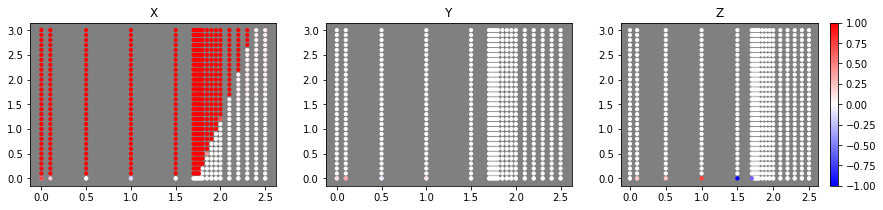

In [166]:
cmap = matplotlib.cm.get_cmap('bwr')

xs = []
ys = []
csx = []
csy = []
csz = []
cs = []
moms = []

for exp in inplane_data:
    hx = exp['configs'][0].hx
    dm = exp['configs'][0].dmfile.interactions[0][7]
    momx, momy, momz = exp['restartfiles'][0].avg_M()
    mom = np.sqrt(momx**2 + momy**2 + momz**2)
    xs.append(dm)
    ys.append(hx/mRyToTesla)

    colorx=cmap((momx+1)/2)
    colory=cmap((momy+1)/2)
    colorz=cmap((momz+1)/2)
    colormag = cmap(mom)
    csx.append(colorx)
    csy.append(colory)
    csz.append(colorz)
    cs.append(colormag)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

# plt.figure(1, figsize=(10,10))
ax1.scatter(xs, ys, color=csx, s=10)
ax1.set_title("X")
ax1.set_facecolor("grey")
# plt.colorbar()

# plt.figure(2, figsize=(10,10))
ax2.scatter(xs, ys, color=csy, s=10)
ax2.set_title("Y")
ax2.set_facecolor("grey")

# plt.colorbar()


# plt.figure(3, figsize=(10,10))
sc3 = ax3.scatter(xs, ys, s=10)
ax3.set_title("Z")
ax3.set_facecolor("grey")

sc3.set(color=csz)
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=matplotlib.colors.Normalize(vmin=-1, vmax=1)))


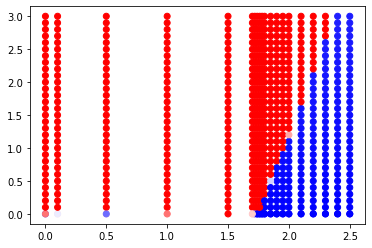

In [169]:
plt.scatter(xs, ys, color=cs)

In [162]:
def mag_x(dms, hxs):
    eff_dm = dms - np.sqrt(3)
    magx = hxs / eff_dm / (np.sqrt(3)*2.7)
    magx[magx>=1] = 1
    magx[magx<1] = 0
    return magx

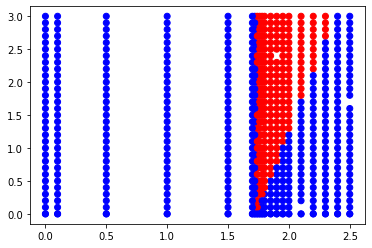

In [163]:
cs2 = cmap(mag_x(xs, ys))

plt.scatter(xs, ys, color=cs2)


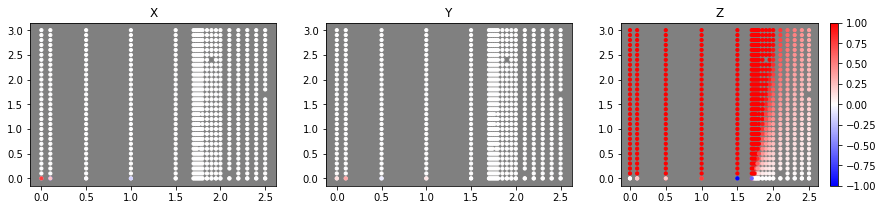

In [118]:
cmap = matplotlib.cm.get_cmap('bwr')

xs = []
ys = []
csx = []
csy = []
csz = []
cs = []
moms = []

for exp in outplane_data:
    hx = exp['configs'][0].hz
    dm = exp['configs'][0].dmfile.interactions[0][7]
    momx, momy, momz = exp['restartfiles'][0].avg_M()
    mom = np.sqrt(momx**2 + momy**2 + momz**2)
    xs.append(dm)
    ys.append(hx/mRyToTesla)

    colorx=cmap((momx+1)/2)
    colory=cmap((momy+1)/2)
    colorz=cmap((momz+1)/2)
    colormag = cmap(mom)
    csx.append(colorx)
    csy.append(colory)
    csz.append(colorz)
    cs.append(colormag)
    moms.append(mom)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

# plt.figure(1, figsize=(10,10))
ax1.scatter(xs, ys, color=csx, s=10)
ax1.set_title("X")
ax1.set_facecolor("grey")
# plt.colorbar()

# plt.figure(2, figsize=(10,10))
ax2.scatter(xs, ys, color=csy, s=10)
ax2.set_title("Y")
ax2.set_facecolor("grey")

# plt.colorbar()


# plt.figure(3, figsize=(10,10))
sc3 = ax3.scatter(xs, ys, s=10)
ax3.set_title("Z")
ax3.set_facecolor("grey")

sc3.set(color=csz)
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=matplotlib.colors.Normalize(vmin=-1, vmax=1)))


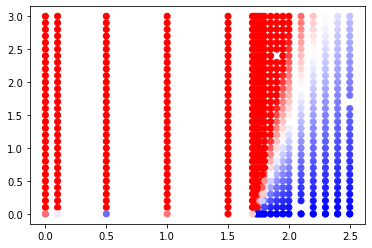

In [121]:
plt.scatter(xs, ys, color=cs)

array([[1.        , 0.        , 0.        , 1.        ],
       [0.10980392, 0.10980392, 1.        , 1.        ],
       [0.09411765, 0.09411765, 1.        , 1.        ],
       ...,
       [1.        , 0.        , 0.        , 1.        ],
       [0.51764706, 0.51764706, 1.        , 1.        ],
       [0.30588235, 0.30588235, 1.        , 1.        ]])

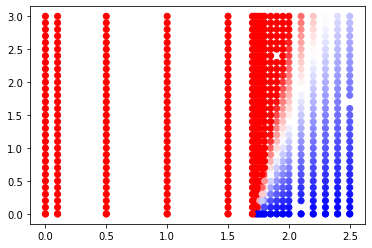

In [117]:

cs2 = cmap(mag_z(xs, ys))
plt.scatter(xs, ys, color=cs2)


In [138]:
moms2 = mag_z(xs, ys)
print(np.average((moms2-moms)**2))

0.0055506982652294016


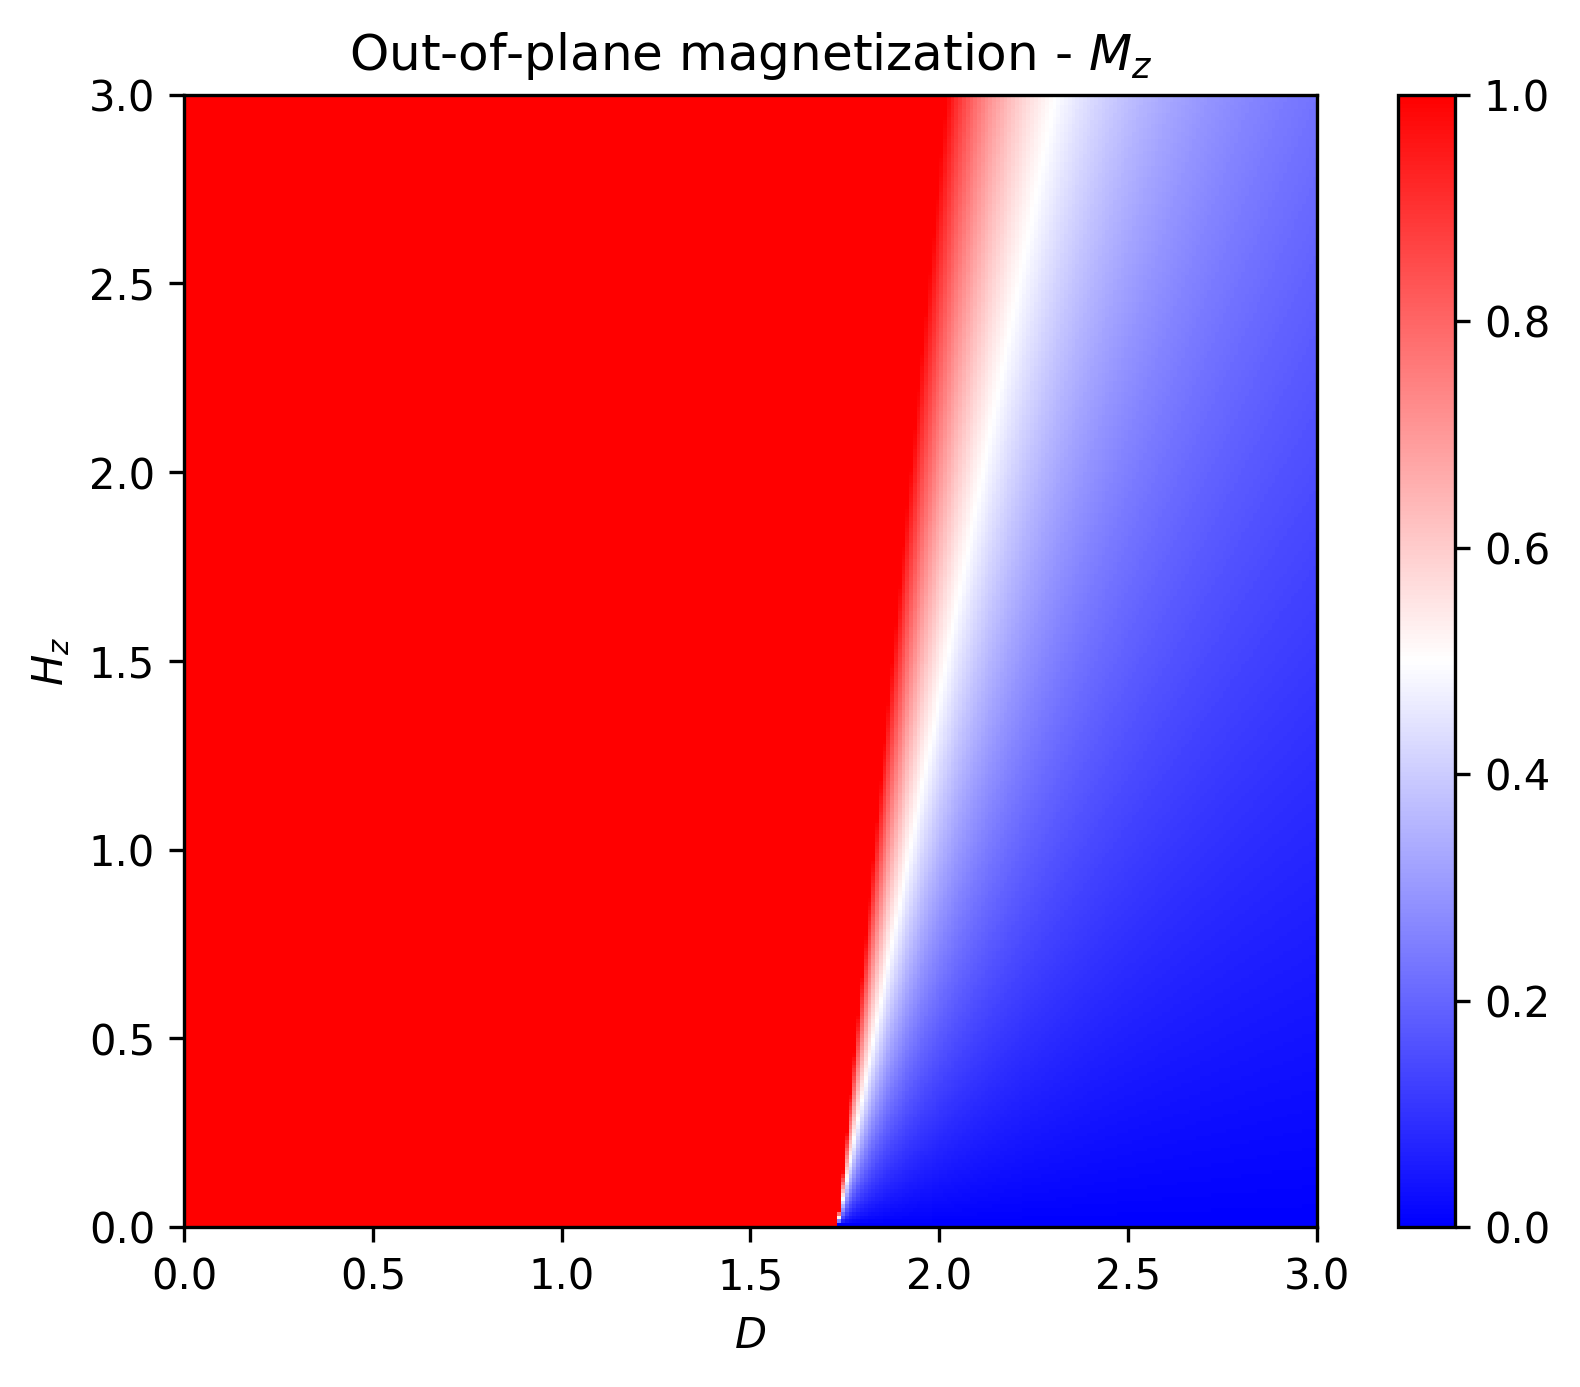

In [139]:
nPixels=300
maxdm = 3
maxh = 3
dmvals = np.linspace(0, maxdm, num=nPixels)
hvals = np.linspace(0, maxh, num=nPixels)

import itertools
vals = np.array(list(itertools.product(hvals, dmvals)))
dms = vals[:,1]
hs = vals[:,0]
mags = mag_z(dms, hs)
mags = mags.reshape((nPixels, nPixels))
plt.figure(figsize=(7, 5), dpi=300)
plt.imshow(mags, origin="lower", cmap="bwr", extent=(0, maxdm, 0, maxh))
plt.xlabel(r"$D$")
plt.ylabel(r"$H_z$")
plt.title(r"Out-of-plane magnetization - $M_z$")
plt.colorbar()

In [137]:
def mag_z(dms, hzs):
    eff_dm = dms - np.sqrt(3)
    magz = hzs / eff_dm / (np.sqrt(3)*6)
    ones = np.ones(magz.shape)
    magz = np.min(np.array([ones, magz]), axis=0)
    magz[dms<np.sqrt(3)] = 1
    return magz

In [69]:
xs = []
ys = []
dm = 2
for exp in outplane_data:
    if exp['configs'][0].dmfile.interactions[0][7] != dm:
        continue
    xs.append(exp['configs'][0].hz/mRyToTesla)
    ys.append(exp['restartfiles'][0].avg_M()[2])
ys2 = mag_z(dm, np.array(xs))


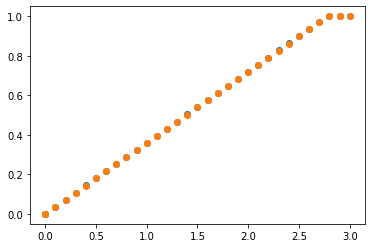

In [70]:
plt.scatter(xs, ys)
plt.scatter(xs, ys2)


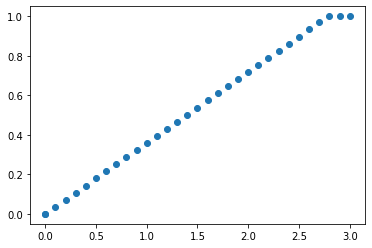

In [67]:
plt.scatter(xs, ys2)



In [43]:
ys2

array([1.        , 0.3572509 , 0.29770908, 0.89312725, 0.83358543,
       1.        , 1.        , 1.        , 0.77404361, 1.        ,
       0.53587635, 1.        , 1.        , 0.11908363, 0.65495998,
       0.23816727, 0.59541817, 1.        , 0.47633453, 1.        ,
       0.41679272, 0.05954182, 0.7145018 , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.17862545, 1.        ,
       0.95266906])